## Tommy's Optimal Portfolio 

- Using just your assets I will find where the capital market line is tangent to the efficient frontier. The optimal combination of a set of portfolios that offer the lowest risk for a given return and the highest return for a given amount of risk is the **efficient frontier.** The *line* that is drawn tangently to the efficient frontier from the rate of return that is the risk-free is the capital makret line. 

-This **Tangency Portfolio** I find maximizes the Sharpe ratio.


$\underset{x_{1},x_{2},...,x_{N}}{\max}~\mathrm{SR}_{p}=\frac{\mu_{p}-r_{f}}{\sigma_{p}}$


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import seaborn as sns
import yfinance as yf
import scipy as scs

In [2]:
plt.style.use("seaborn")
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [41]:
# Getting Data
tickers = "AAPL MSFT GS VYM XOM JPM WTRG OXY ^GSPC BUD VNQ HD NFLX"
start = "2003-01-01"
end = "2022-09-01"
adj_close = pd.DataFrame(yf.download(tickers, start, end)["Adj Close"])
adj_close.dropna(inplace = True)
adj_close.columns = ["Apple", "Budweiser", "Goldman", "Home Depot", "JP Morgan", "Microsoft", "Netflix", "Occidental Petroleum","Vanguard Real Estate", "Vanguard High Dividend","Essential Utilities", "Exxon", "S&P 500"]


[*********************100%***********************]  13 of 13 completed


array([[<AxesSubplot:title={'center':'Apple'}>,
        <AxesSubplot:title={'center':'Budweiser'}>,
        <AxesSubplot:title={'center':'Goldman'}>,
        <AxesSubplot:title={'center':'Home Depot'}>],
       [<AxesSubplot:title={'center':'JP Morgan'}>,
        <AxesSubplot:title={'center':'Microsoft'}>,
        <AxesSubplot:title={'center':'Netflix'}>,
        <AxesSubplot:title={'center':'Occidental Petroleum'}>],
       [<AxesSubplot:title={'center':'Vanguard Real Estate'}>,
        <AxesSubplot:title={'center':'Vanguard High Dividend'}>,
        <AxesSubplot:title={'center':'Essential Utilities'}>,
        <AxesSubplot:title={'center':'Exxon'}>],
       [<AxesSubplot:title={'center':'S&P 500'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

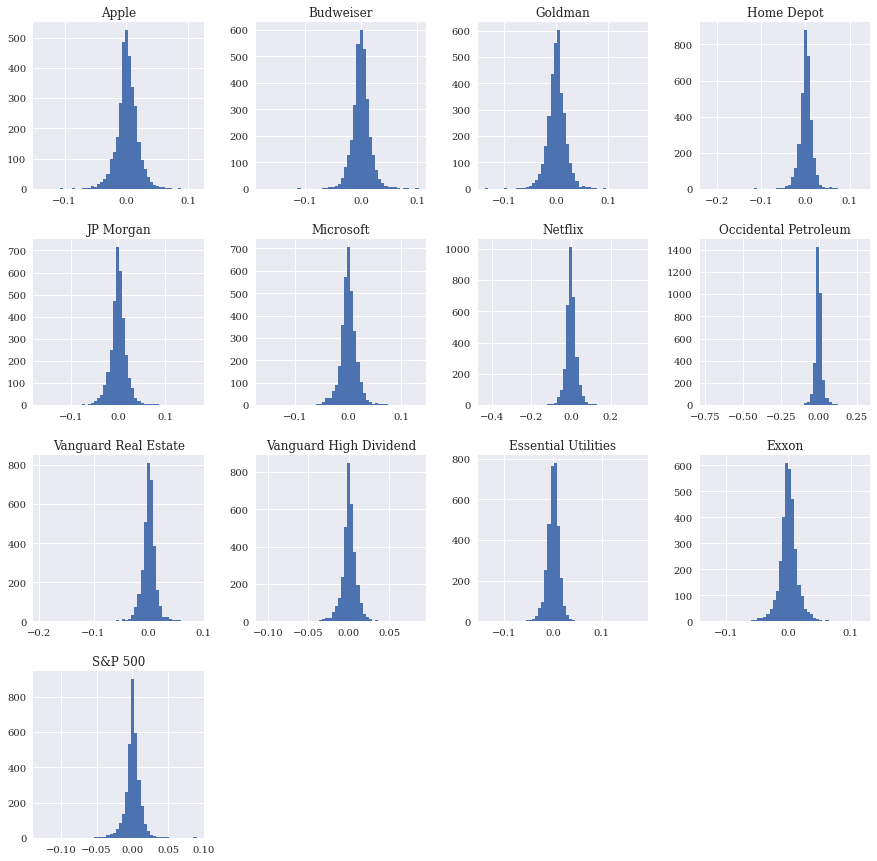

In [42]:
# Computing Log Returns
noa = 13
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns.dropna(inplace = True)
log_returns.hist(bins = 50, figsize = (15,15))

Text(0.5, 1.0, 'Value of $1 Dollar Invested')

<Figure size 1440x1080 with 0 Axes>

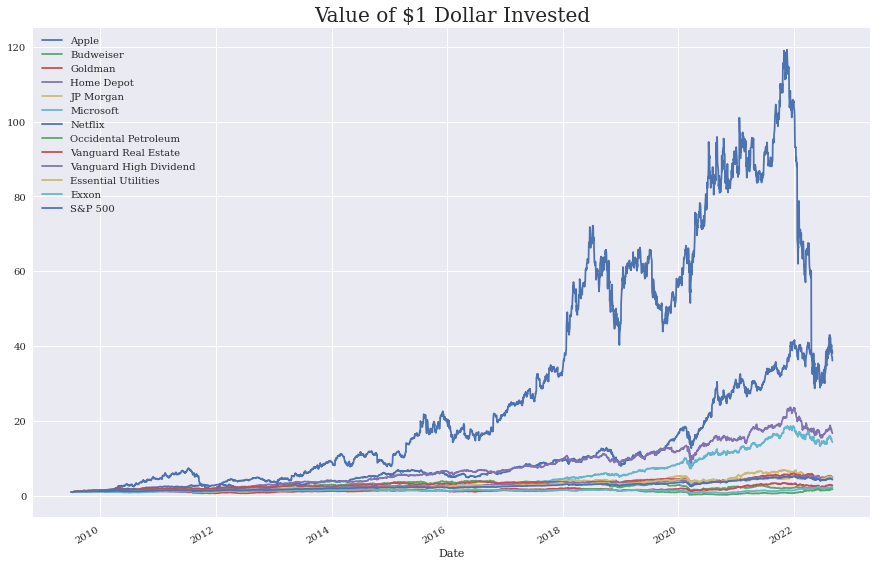

In [43]:
plt.figure(figsize = (20,15))
log_returns.cumsum().apply(np.exp).plot(figsize = (15,10))
plt.title("Value of $1 Dollar Invested", size = 20)

In [44]:
#Annualized Return
log_returns.mean()*252

Apple                     0.272617
Budweiser                 0.040266
Goldman                   0.077406
Home Depot                0.213954
JP Morgan                 0.117054
Microsoft                 0.202316
Netflix                   0.277567
Occidental Petroleum      0.040698
Vanguard Real Estate      0.120498
Vanguard High Dividend    0.120616
Essential Utilities       0.119643
Exxon                     0.061280
S&P 500                   0.110587
dtype: float64

In [45]:
#Covariance Matrix
log_returns.cov()*252

,Apple,Budweiser,Goldman,Home Depot,JP Morgan,Microsoft,Netflix,Occidental Petroleum,Vanguard Real Estate,Vanguard High Dividend,Essential Utilities,Exxon,S&P 500
Apple,0.080014,0.024835,0.036270,0.030896,0.033779,0.042017,0.041700,0.036545,0.027527,0.025925,0.020292,0.023503,0.033900
Budweiser,0.024835,0.072059,0.035179,0.026542,0.037337,0.025659,0.022850,0.047041,0.029163,0.025857,0.020486,0.029955,0.027458
Goldman,0.036270,0.035179,0.085295,0.034759,0.069094,0.036575,0.035134,0.061355,0.035056,0.034722,0.022158,0.039500,0.038098
Home Depot,0.030896,0.026542,0.034759,0.054803,0.035099,0.031713,0.030335,0.033710,0.030411,0.025890,0.023208,0.023345,0.029720
JP Morgan,0.033779,0.037337,0.069094,0.035099,0.082813,0.035314,0.029560,0.066297,0.038014,0.036712,0.025193,0.041505,0.038764
Microsoft,0.042017,0.025659,0.036575,0.031713,0.035314,0.065452,0.044486,0.035119,0.028115,0.027132,0.022478,0.024060,0.033900
Netflix,0.041700,0.022850,0.035134,0.030335,0.029560,0.044486,0.267063,0.027919,0.024550,0.022874,0.016470,0.017386,0.033316
Occidental Petroleum,0.036545,0.047041,0.061355,0.033710,0.066297,0.035119,0.027919,0.207250,0.042608,0.042682,0.028723,0.080929,0.042557
Vanguard Real Estate,0.027527,0.029163,0.035056,0.030411,0.038014,0.028115,0.024550,0.042608,0.047560,0.027125,0.030900,0.026820,0.029562
Vanguard High Dividend,0.025925,0.025857,0.034722,0.025890,0.036712,0.027132,0.022874,0.042682,0.027125,0.025886,0.022253,0.029237,0.026978


## Generating Risk-Return Profiles for a given allocation of Assets 

**Here I simulate allocations and the code records the resulting expected portfolio return and variance.** 

In [46]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [47]:
def port_ret(weights):
    return np.sum(log_returns.mean() *weights)*252
def port_vol(weights):
    return np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252, weights)))
prets = []
pvols = []
for p in range(8000):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

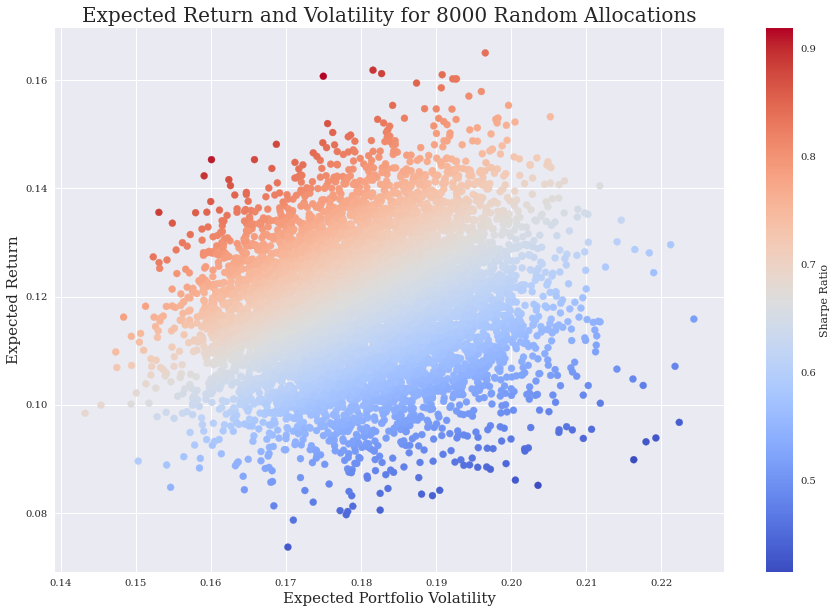

In [20]:
from scipy.ndimage import label


plt.figure(figsize = (15,10))
plt.scatter(pvols, prets, c = prets/pvols,marker = 'o', cmap = "coolwarm")
plt.xlabel("Expected Portfolio Volatility", fontsize = 15)
plt.ylabel("Expected Return", fontsize = 15)
plt.title("Expected Return and Volatility for 8000 Random Allocations", size = 20)
plt.colorbar(label = "Sharpe Ratio")
plt.show()

## Finding the Efficient Frontier


In [48]:
import scipy.optimize as sco

def min_func_sharpe(weights):
    return -port_ret(weights)/port_vol(weights)
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})
bnds = tuple((0,1) for x in range(noa))
eweights = np.array(noa*[1./noa,])
eweights
min_func_sharpe(eweights)

-0.7111579641783428

In [50]:
opts = sco.minimize(min_func_sharpe, eweights, method = "SLSQP", constraints = cons)
pd.DataFrame(opts['x'].round(3), index = ["Apple", "Budweiser", "Goldman", "Home Depot", "JP Morgan", "Microsoft", "Netflix", "Occidental Petroleum", "Vanguard Real Estate", "Vanguard High Dividend","Essential Utilities", "Exxon", "S&P 500"], columns = ["Weights"])

,Weights
Apple,0.770
Budweiser,-0.189
Goldman,-0.210
Home Depot,0.639
JP Morgan,0.136
Microsoft,0.523
Netflix,0.167
Occidental Petroleum,-0.066
Vanguard Real Estate,0.119
Vanguard High Dividend,4.123


In [51]:
print("The resulting portfolio return and portfolio volatility from the optimal weights are", np.round(port_ret(opts['x']),4), "and",np.round(port_vol(opts["x"]),4), "respectively.")

The resulting portfolio return and portfolio volatility from the optimal weights are 0.4553 and 0.2666 respectively.


You see that some of these weights are **negative** this is because if you were *short* meaning a negative allocation and long on the other's you **maximize** the sharpe ratio for that particular given **allocation**. You'll see below that we will eliminate this assumption so that you are only in **long positions.**

- Here I will compute the **Minimization of the Variance** *for  given allocation.*

In [52]:
optv = sco.minimize(port_vol, eweights, method = "SLSQP", bounds = bnds, constraints = cons)
pd.DataFrame(optv['x'].round(3), index = ["Apple", "Budweiser", "Goldman", "Home Depot", "JP Morgan", "Microsoft", "Netflix", "Occidental Petroleum", "Vanguard Real Estate", "Vanguard High Dividend","Essential Utilities", "Exxon", "S&P 500"], columns = ["Weights"])


,Weights
Apple,0.000
Budweiser,0.004
Goldman,0.000
Home Depot,0.000
JP Morgan,0.000
Microsoft,0.000
Netflix,0.013
Occidental Petroleum,0.000
Vanguard Real Estate,0.000
Vanguard High Dividend,0.870


This makes sense because obviously a TIP fund is way less volatile, hence you will minimize your portfolio variance a.k.a **risk.** 

In [53]:
print("Expected return", port_ret(optv['x']),"and minimizing portfolio volatility is", port_vol(optv['x']))

Expected return 0.12226489416136486 and minimizing portfolio volatility is 0.15947944969195965


- The expected return for maximized return for the best *sharpe ratio*  is about $\mu_{p} = 0.452$ with a portfolio variance of  $\sigma_{p} = .1602$

- The expected return for the minimum variance portfolio about $\mu_{p} = 0.1205$ with a minimum variance of $\sigma_{p} = 0.15958$. 

            Your portfolio has high volatility, which is not necessarily a bad thing. 



## Graph of Efficient Frontier


In [54]:
cons = ({'type':'eq', 'fun': lambda x: port_ret(x)-tret}, {'type':'eq', 'fun': lambda x: np.sum(x)-1})
bnds = tuple((0,1)for x in weights)
trets = np.linspace(.04,.2,50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol,eweights, method = "SLSQP", bounds = bnds, constraints = cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

Text(0.5, 1.0, 'Efficient Frontier for Given Risk Level ')

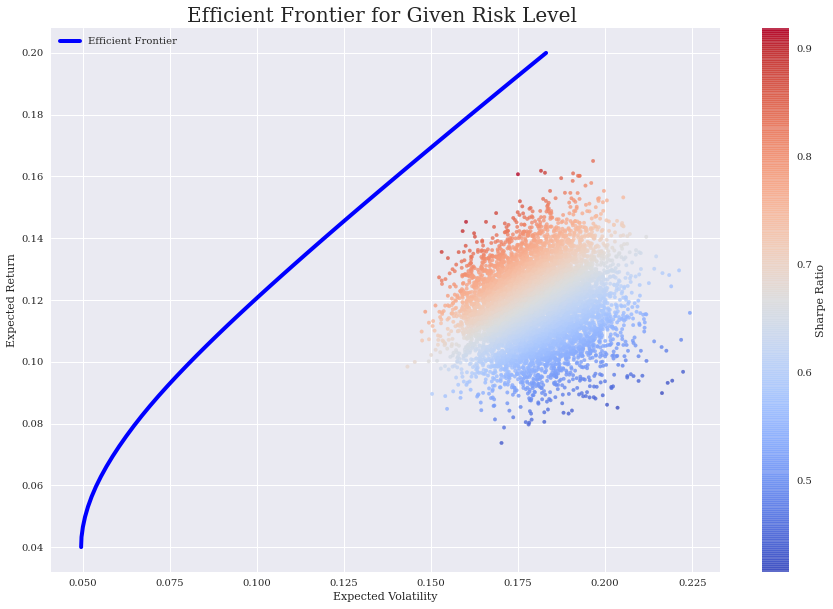

In [36]:
plt.figure(figsize = (15,10))
plt.scatter(pvols, prets, c = prets/pvols, marker = '.', alpha = 0.8, cmap = 'coolwarm')
plt.plot(tvols, trets, 'b',label = "Efficient Frontier",lw =4.0)
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.legend(loc = "upper left")
plt.colorbar(label = "Sharpe Ratio")
plt.title("Efficient Frontier for Given Risk Level ", fontsize = 20)

## Capital Market Line and Efficient Frontier for Optimal Portfolio

In [37]:
import scipy.interpolate as sci
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]
tck = sci.splrep(evols, erets)

def f(x):
    return sci.splev(x, tck, der = 0)
def df(x):
    #First derivative of efficient frontier
    return sci.splev(x,tck, der = 1)

In [38]:
def equations(p, rf = 0.01):
    eq1 = rf - p[0]
    eq2 = rf +p[1]*p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3
opt = sco.fsolve(equations, [.01,.5,.15])   

np.round(equations(opt), 6)

array([0., 0., 0.])

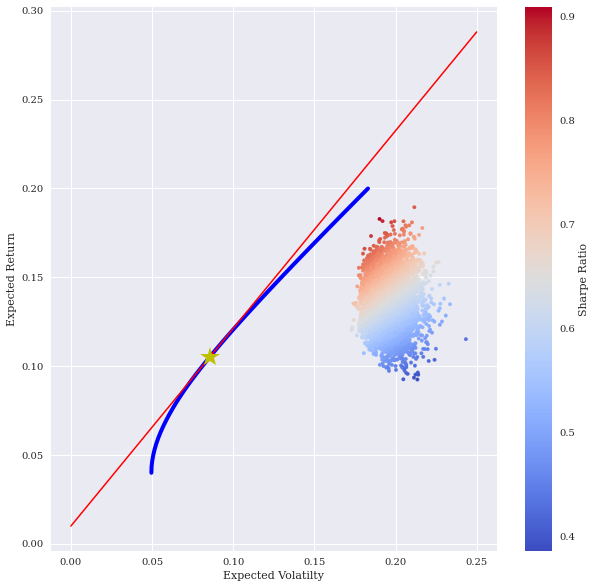

In [55]:
plt.figure(figsize = (10,10))
plt.plot(evols, erets, 'b', lw=4, label = "Efficient Frontier")
plt.scatter(pvols,prets, c = (prets -.01)/pvols,marker = '.', cmap = 'coolwarm')
cx = np.linspace(0,.250)
plt.plot(cx, opt[0]+opt[1]*cx, 'r', lw =1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize = 20.0)
plt.grid(True)
plt.xlabel("Expected Volatilty")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

In [57]:
cons = ({'type':'eq', 'fun': lambda x: port_ret(x)-f(opt[2])}, {'type':'eq', 'fun': lambda x: np.sum(x)-1})
res = sco.minimize(port_vol, eweights, method = "SLSQP", bounds = bnds, constraints = cons)

pd.DataFrame(res['x'].round(3), index =["Apple", "Budweiser", "Goldman", "Home Depot", "JP Morgan", "Microsoft", "Netflix", "Occidental Petroleum", "Vanguard Real Estate", "Vanguard High Dividend","Essential Utilities", "Exxon", "S&P 500"] , columns = ["Weights"])

,Weights
Apple,0.000
Budweiser,0.145
Goldman,0.000
Home Depot,0.000
JP Morgan,0.000
Microsoft,0.000
Netflix,0.000
Occidental Petroleum,0.000
Vanguard Real Estate,0.000
Vanguard High Dividend,0.660


In [59]:
pd.DataFrame([port_ret(res['x']).round(4), port_vol(res['x']).round(4)], index = ["Portfolio Return", "Portfolio Volatility"], columns = ["Portfolio Characteristics"])

,Portfolio Characteristics
Portfolio Return,0.105
Portfolio Volatility,0.164


The reason I took out *TIPs* is because you want to be aggressive. The optimal portfolio allocation with TIPs would definitely limit risk but you would not have sustained returns. 
Does the allocation of Vanguard High Dividend make sense? It does because it's sharpe ratio is the highest, so you are better off always allocating more in there than holding considerable apple shares. 